# Hyderabad City Power Consumptions  
### Predict power consumption across three zones in the city by the Electricity board of Hyderabad
#### Description
You have been hired as a Data science consultant by the Electricity board of Hyderabad to predict power consumption across three zones across the city. Your forecasts will help the electricity board to plan for the projected electricity requirements and make necessary agreements to avoid at shortfall of power to the city. You’ll develop models trained on historical power consumption data across the three zones. Besides the power consumption data, you will also have some other parameters that can impact the power consumption in a region. With reasonable efforts, you should be able to get to a MAPE performance of less than 6%.  

#### Evaluation
Submissions are evaluated on MAPE (Mean Absolute Percentage Error) between predicted and actual values. Final evaluation metric is the mean of the MAPEs calculated for three zones

#### Submission Format
For each DateTime you must predict the power consumption for all 3 zones. The file should contain a header and have the following format: DateTime, Zone 1 Power Consumption, Zone 2 Power Consumption, Zone 3 Power Consumption 2017-12-01 00:00:00,37237.94,28259.26,38923.04 2017-12-01 00:10:00,16652.03,26271.69,22312.31 2017-12-01 00:20:00,31705.53,30985.58,23373.82 2017-12-01 00:30:00,46446.41,23514.69,6275.89 etc.  

#### Citation
0812, udheep, vaibhaw khemka. (2023). Hyderabad City Power Consumptions. Kaggle. https://kaggle.com/competitions/hyderabad-city-power-consumptions

### Table of contents
<a id="top"></a>

<div style="background-color: rgba(60, 121, 245, 0.03); padding:10px; font-size:15px; font-family: consolas;">
<ul>
    <li><a href="#1" target="_self" rel=" noreferrer nofollow">1. Get Data</a></li>
    <li><a href="#2" target="_self" rel=" noreferrer nofollow">2. Install and Import Libraries</a></li>
    <li><a href="#3" target="_self" rel=" noreferrer nofollow">3. Exploratory Data Analysis on raw data</a>
        <ul>
            <li><a href="#3.1" target="_self" rel=" noreferrer nofollow">3.1 Observation 1</a></li>
            <li><a href="#3.2" target="_self" rel=" noreferrer nofollow">3.2 Observation 2</a></li>
            <li><a href="#3.3" target="_self" rel=" noreferrer nofollow">3.3 Observation 3</a></li>
        </ul> 
    </li>
    <li><a href="#4" target="_self" rel=" noreferrer nofollow">4. Train Dev Test Split</a></li>
    <li><a href="#5" target="_self" rel=" noreferrer nofollow">5. Data Pre-processing</a></li>
    <li><a href="#6" target="_self" rel=" noreferrer nofollow">6. Exploratory Data Analysis on pre-processed data</a>
        <ul>
            <li><a href="#6.1" target="_self" rel=" noreferrer nofollow">6.1 Observation</a></li>
        </ul> 
    </li>
    <li><a href="#7" target="_self" rel=" noreferrer nofollow">7. Evaluation method</a></li>
    <li><a href="#8" target="_self" rel=" noreferrer nofollow">8. Modelling</a>
        <ul>
            <li><a href="#8.1" target="_self" rel=" noreferrer nofollow">8.1 Simple Baseline model</a></li>
            <li><a href="#8.2" target="_self" rel=" noreferrer nofollow">8.2 XGBoost model</a></li>
        </ul> 
    </li>
    <li><a href="#9" target="_self" rel=" noreferrer nofollow">9. Hyperparameter optimization</a>
        <ul>
            <li><a href="#9.1" target="_self" rel=" noreferrer nofollow">9.1 Creating folds for cross-validation</a></li>
            <li><a href="#9.2" target="_self" rel=" noreferrer nofollow">9.2 Running the model with the initial set of hyperparameters on the folds</a></li>
            <li><a href="#9.3" target="_self" rel=" noreferrer nofollow">9.3 Tuning of model architecture/complexity</a></li>
            <li><a href="#9.4" target="_self" rel=" noreferrer nofollow">9.4 Tuning of data sampling strategy</a></li>
            <li><a href="#9.5" target="_self" rel=" noreferrer nofollow">9.5 Tuning the learning rate</a></li>
            <li><a href="#9.6" target="_self" rel=" noreferrer nofollow">9.6 Tuning of number of iteration</a></li>
        </ul>
    </li>
    <li><a href="#10" target="_self" rel=" noreferrer nofollow">10. Training our best model on complete training data before inferencing on new data</a></li>
    <li><a href="#11" target="_self" rel=" noreferrer nofollow">11. Predictions on Inference data</a></li>
    <li><a href="#12" target="_self" rel=" noreferrer nofollow">12. Vizualizing the predictions</a></li>
    <li><a href="#13" target="_self" rel=" noreferrer nofollow">13. Creating Submission file</a></li>
</ul>

</div>

<a id="1"></a>
### Get Data

In [1]:
#get data from git repo
!git clone https://github.com/ArvindRoshaan/hackathon-time-series-regression.git
!mv hackathon-time-series-regression/*.csv .
!rm -rf hackathon-time-series-regression

Cloning into 'hackathon-time-series-regression'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 1.40 MiB | 949.00 KiB/s, done.
Resolving deltas: 100% (3/3), done.


<a id="2"></a>
### Install and Import Libraries

In [1]:
#packages to install in colab
#!pip install -q xgboost==1.7 #instead of 0.9, 1.7 required for mape functionality
# packages to install in local machine once

In [2]:
# Warning Libraries 
#warnings.filterwarnings("ignore")

#generic imports
import time
import math

#data manipulation libraries
import pandas as pd
import numpy as np

#ml library
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

#boosting algorithm libraries
import xgboost as xgb

#data visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns

<a id="3"></a>
### Exploratory Data Analysis on raw data

In [3]:
train_complete = pd.read_csv('Hyderabad_Power_Train.csv')
test_complete = pd.read_csv('Hyderabad_Power_Test.csv')

In [4]:
train_complete.sample(n=3)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
33789,2017-08-26 03:20:00,22.53,87.10,4.924,0.088,0.085,28800.00000,18110.24287,18116.61442
2604,2017-01-19 08:00:00,10.48,80.00,0.080,0.084,0.193,23690.12658,16077.81155,11762.89157
30865,2017-08-05 14:40:00,29.41,60.69,4.906,390.200,249.100,40275.24972,28020.69694,27505.95611


In [5]:
test_complete.sample(3)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
2935,2017-12-21 09:10:00,16.11,67.26,0.074,15.450,15.800
1694,2017-12-12 18:20:00,19.81,28.87,0.086,0.351,0.356
3947,2017-12-28 09:50:00,12.08,76.50,0.086,197.300,39.210


In [6]:
#rename all columns for convenience
inp_feat_names = ['date_time', 'temperature', 'humidity', 'wind_speed', 'gen_diff_flow', 'diff_flow']
out_feat_names = ['zone1_power', 'zone2_power', 'zone3_power']
train_complete_feat_names = inp_feat_names+out_feat_names
train_complete = train_complete.set_axis(train_complete_feat_names, axis='columns', copy=False)
test_complete = test_complete.set_axis(inp_feat_names, axis='columns', copy=False)
print(f"Training set columns: {train_complete.columns}")
print(f"Test set columns: {test_complete.columns}")

Training set columns: Index(['date_time', 'temperature', 'humidity', 'wind_speed', 'gen_diff_flow',
       'diff_flow', 'zone1_power', 'zone2_power', 'zone3_power'],
      dtype='object')
Test set columns: Index(['date_time', 'temperature', 'humidity', 'wind_speed', 'gen_diff_flow',
       'diff_flow'],
      dtype='object')


In [7]:
print(f"Data type of DateTime is: {type(train_complete['date_time'][0])}")

Data type of DateTime is: <class 'str'>


In [8]:
#converting DateTime column from str to Timestamp
train_complete['date_time'] = pd.to_datetime(train_complete['date_time'])
test_complete['date_time'] = pd.to_datetime(test_complete['date_time'])

In [9]:
print(f"Data type of DateTime is: {type(train_complete['date_time'][0])}")

Data type of DateTime is: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


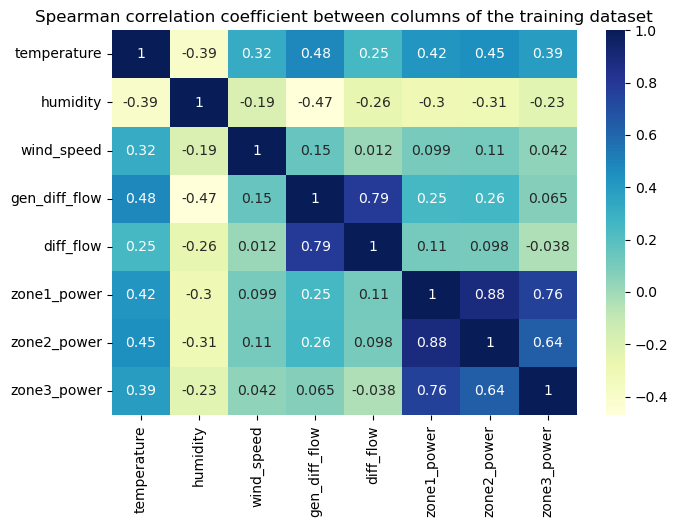

In [10]:
#correlation within training features
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))
#correlation between all features of the training data
ax.set_title("Spearman correlation coefficient between columns of the training dataset")
train_complete_corr_plot = sns.heatmap(train_complete.corr(method='spearman', numeric_only=True), cmap="YlGnBu", annot=True, ax=ax)

<a id="3.1"></a>
##### Observations  
1) The output columns are highly correlated with each other  
2) temperature, wind_speed, gen_diff_flow and diff_flow are mostly positively correlated with the output columns    
3) humidity is negatively correlated with the output columns  
4) zone3_power consumption does not correlate with wind_speed, gen_diff_flow and diff_flow unlike the other two zones  
5) gen_diff_flow and diff_flow are highly correlated with each other

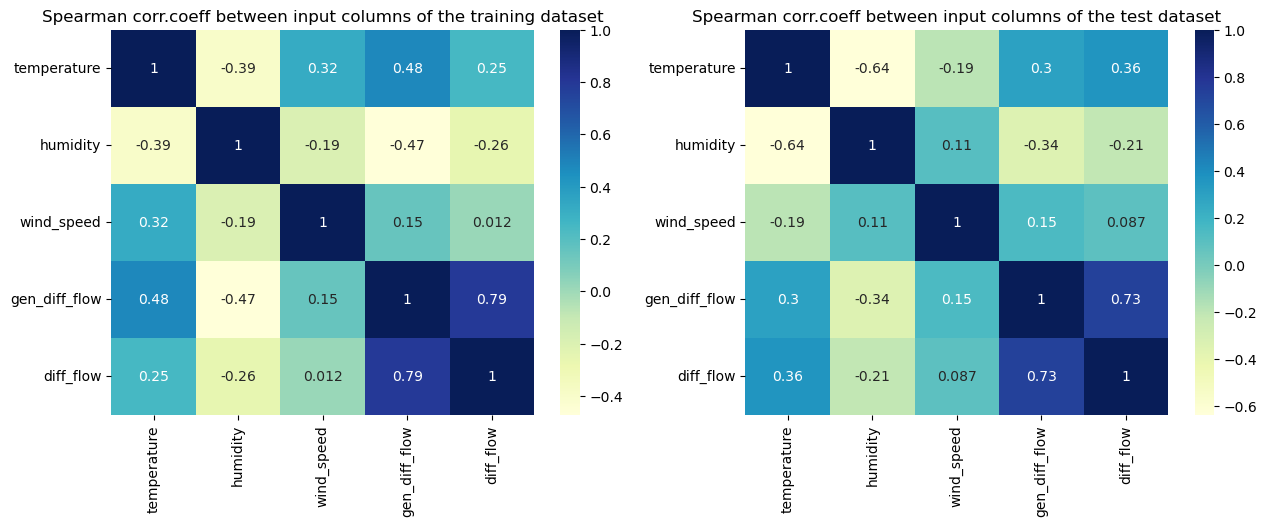

In [11]:
#correlation within training and test input features
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
#correlation between all features of the training data
ax[0].set_title("Spearman corr.coeff between input columns of the training dataset")
train_complete_inp_corr = train_complete[inp_feat_names].corr(method='spearman', numeric_only=True)
train_complete_inp_corr_plot = sns.heatmap(train_complete_inp_corr, cmap="YlGnBu", annot=True, ax=ax[0])

#correlation between all features of the test data
ax[1].set_title("Spearman corr.coeff between input columns of the test dataset")
test_complete_inp_corr = test_complete[inp_feat_names].corr(method='spearman', numeric_only=True)
test_complete_inp_corr_plot = sns.heatmap(test_complete_inp_corr, cmap="YlGnBu", annot=True, ax=ax[1])

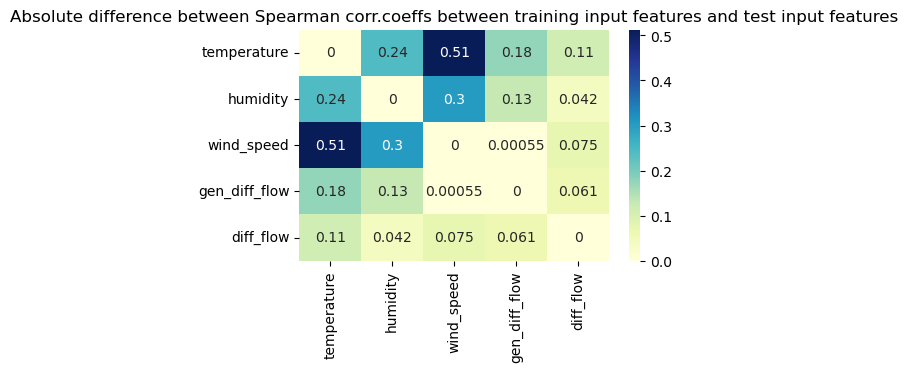

In [12]:
#absolute difference between the correlation within training and test input features
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.set_title("Absolute difference between Spearman corr.coeffs between training input features and test input features")
delta_inp_corr_plot = sns.heatmap(np.abs(train_complete_inp_corr-test_complete_inp_corr), cmap="YlGnBu", annot=True, ax=ax)

<a id="3.2"></a>
##### Observations  
1) Note the drastic difference between the train and test correlation values between temperature and wind_speed  
2) Note the difference between the train and test correlation values between humidity and wind_speed  
3) Note the difference between the train and test correlation values between humidity and temperature  

In [13]:
train_complete_month = train_complete['date_time'].dt.month.apply(lambda x: "0"+str(x) if x<10 else str(x))
train_complete_year = train_complete['date_time'].dt.year.apply(lambda x: str(x))
train_complete_yr_month = train_complete_year+train_complete_month

In [14]:
read_yr_month = lambda x: f"month:{x[-2:]}, year:{x[:4]}"

In [15]:
print(f"The training data is from {read_yr_month(min(train_complete_yr_month))} to {read_yr_month(max(train_complete_yr_month))}")

The training data is from month:01, year:2017 to month:11, year:2017


In [16]:
test_complete_month = test_complete['date_time'].dt.month.apply(lambda x: "0"+str(x) if x<10 else str(x))
test_complete_year = test_complete['date_time'].dt.year.apply(lambda x: str(x))
test_complete_yr_month = test_complete_year+test_complete_month

In [17]:
print(f"The test data is from {read_yr_month(min(test_complete_yr_month))} to {read_yr_month(max(test_complete_yr_month))}")

The test data is from month:12, year:2017 to month:12, year:2017


<a id="3.3"></a>
##### Observations  
Note the differenence in the correlation between training and test input features like humidity, wind_speed and temperature might be because of the seasonal differences (between december and the rest of the year)

<Axes: title={'center': 'zone 3 power vs time'}, xlabel='date_time'>

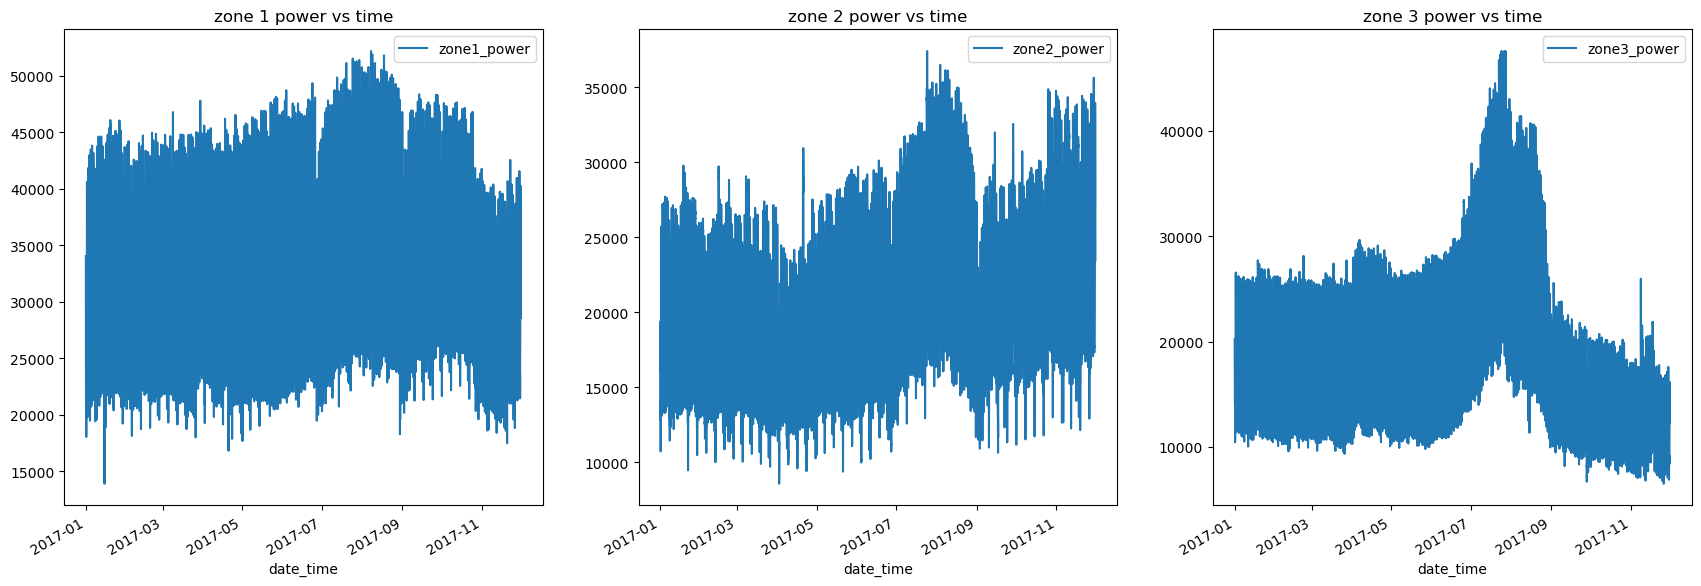

In [18]:
#plots of output variables
fig, ax = plt.subplots(1, 3, figsize=(21, 7))
ax[0].set_title(f"zone 1 power vs time")
train_complete.plot(x="date_time", y="zone1_power", kind="line", ax=ax[0])
ax[1].set_title(f"zone 2 power vs time")
train_complete.plot(x="date_time", y="zone2_power", kind="line", ax=ax[1])
ax[2].set_title(f"zone 3 power vs time")
train_complete.plot(x="date_time", y="zone3_power", kind="line", ax=ax[2])

<a id="4"></a>
### Train Dev Test split

In [19]:
X = train_complete.drop(out_feat_names, axis=1)
y = train_complete[out_feat_names]

In [20]:
X['month'] = X['date_time'].dt.month

In [21]:
#number of data points across each month
X.groupby('month')['date_time'].count()

month
1     4409
2     3997
3     4430
4     4270
5     4406
6     4275
7     4417
8     4418
9     4272
10    4414
11    4288
Name: date_time, dtype: int64

In [22]:
#last month is kept as test data
X_test = X[X['month']==11]
y_test = y.iloc[X_test.index]
test = train_complete.iloc[X_test.index]
print(f"Number of test data points are: {len(X_test)}")

#penultimate month is kept as dev data
X_dev = X[X['month']==10]
y_dev = y.iloc[X_dev.index]
dev = train_complete.iloc[X_dev.index]
print(f"Number of dev data points are: {len(X_dev)}")

#remaining months are kept as training data
X_train = X[(X['month']!=11) & (X['month']!=10)]
y_train = y.iloc[X_train.index]
train = train_complete.iloc[X_train.index]
print(f"Number of train data points are: {len(X_train)}")

assert len(X_train)+len(X_train)+len(X_train) != len(X), "Error in split"

Number of test data points are: 4288
Number of dev data points are: 4414
Number of train data points are: 38894


In [23]:
y_train_zone1 = y_train['zone1_power']
y_train_zone2 = y_train['zone2_power']
y_train_zone3 = y_train['zone3_power']

y_dev_zone1 = y_dev['zone1_power']
y_dev_zone2 = y_dev['zone2_power']
y_dev_zone3 = y_dev['zone3_power']

y_test_zone1 = y_test['zone1_power']
y_test_zone2 = y_test['zone2_power']
y_test_zone3 = y_test['zone3_power']

<a id="5"></a>
### Data Pre-processing

In [24]:
def partOfDay(hour):
    if hour in [4,5]:
        return 1 #"dawn"
    elif hour in [6,7]:
        return 2 #"early morning"
    elif hour in [8,9,10]:
        return 3 #"late morning"
    elif hour in [11,12,13]:
        return 4 #"noon"
    elif hour in [14,15,16]:
        return 5 #"afternoon"
    elif hour in [17, 18,19]:
        return 6 #"evening"
    elif hour in [20, 21, 22]:
        return 7 #"night"
    elif hour in [23,0,1,2,3]:
        return 8 #"midnight"

In [25]:
def create_features(df):
    df = df.copy()
    df['month'] = df['date_time'].dt.month
    df['year'] = df['date_time'].apply(lambda x: x.year)    
    df['quarter'] = df['date_time'].dt.quarter
    df['week_of_year'] = df['date_time'].dt.isocalendar().week
    df["day_of_year"] = df["date_time"].dt.day_of_year
    df["day_of_week"] = df["date_time"].dt.day_of_week
    df["holiday"] = df["day_of_week"].apply(lambda x: x==5 or x==6)
    df["weekstarts"] = df["day_of_week"].apply(lambda x: x==0)
    df["weekends"] = df["day_of_week"].apply(lambda x: x==4)
    df["day_of_month"] = df["date_time"].dt.day
    df["hour"] = df["date_time"].dt.hour
    df["part_of_day"] = df["hour"].apply(partOfDay)
    df["minute_of_day"] = (df["date_time"].dt.hour)*60 + df["date_time"].dt.minute
    
    df.drop(['date_time'], axis=1, inplace=True)
    
    return df.astype(float)

In [26]:
X_train = create_features(X_train)
train = create_features(train)
X_dev = create_features(X_dev)
dev = create_features(dev)
X_test = create_features(X_test)
test = create_features(test)

In [27]:
X_train.sample(3)

,temperature,humidity,wind_speed,gen_diff_flow,diff_flow,month,year,quarter,week_of_year,day_of_year,day_of_week,holiday,weekstarts,weekends,day_of_month,hour,part_of_day,minute_of_day
35027,20.83,61.62,0.230,0.095,0.122,9.0,2017.0,3.0,35.0,246.0,6.0,1.0,0.0,0.0,3.0,20.0,7.0,1230.0
18340,21.38,72.70,NaN,604.500,NaN,5.0,2017.0,2.0,19.0,129.0,1.0,0.0,0.0,0.0,9.0,16.0,5.0,990.0
1115,15.30,74.40,0.073,0.073,0.122,1.0,2017.0,1.0,1.0,8.0,6.0,1.0,0.0,0.0,8.0,20.0,7.0,1240.0


<a id="6"></a>
### Exploratory Data Analysis on pre-processed data

<Axes: title={'center': 'Spearman correlation coefficient between columns of the training dataset'}>

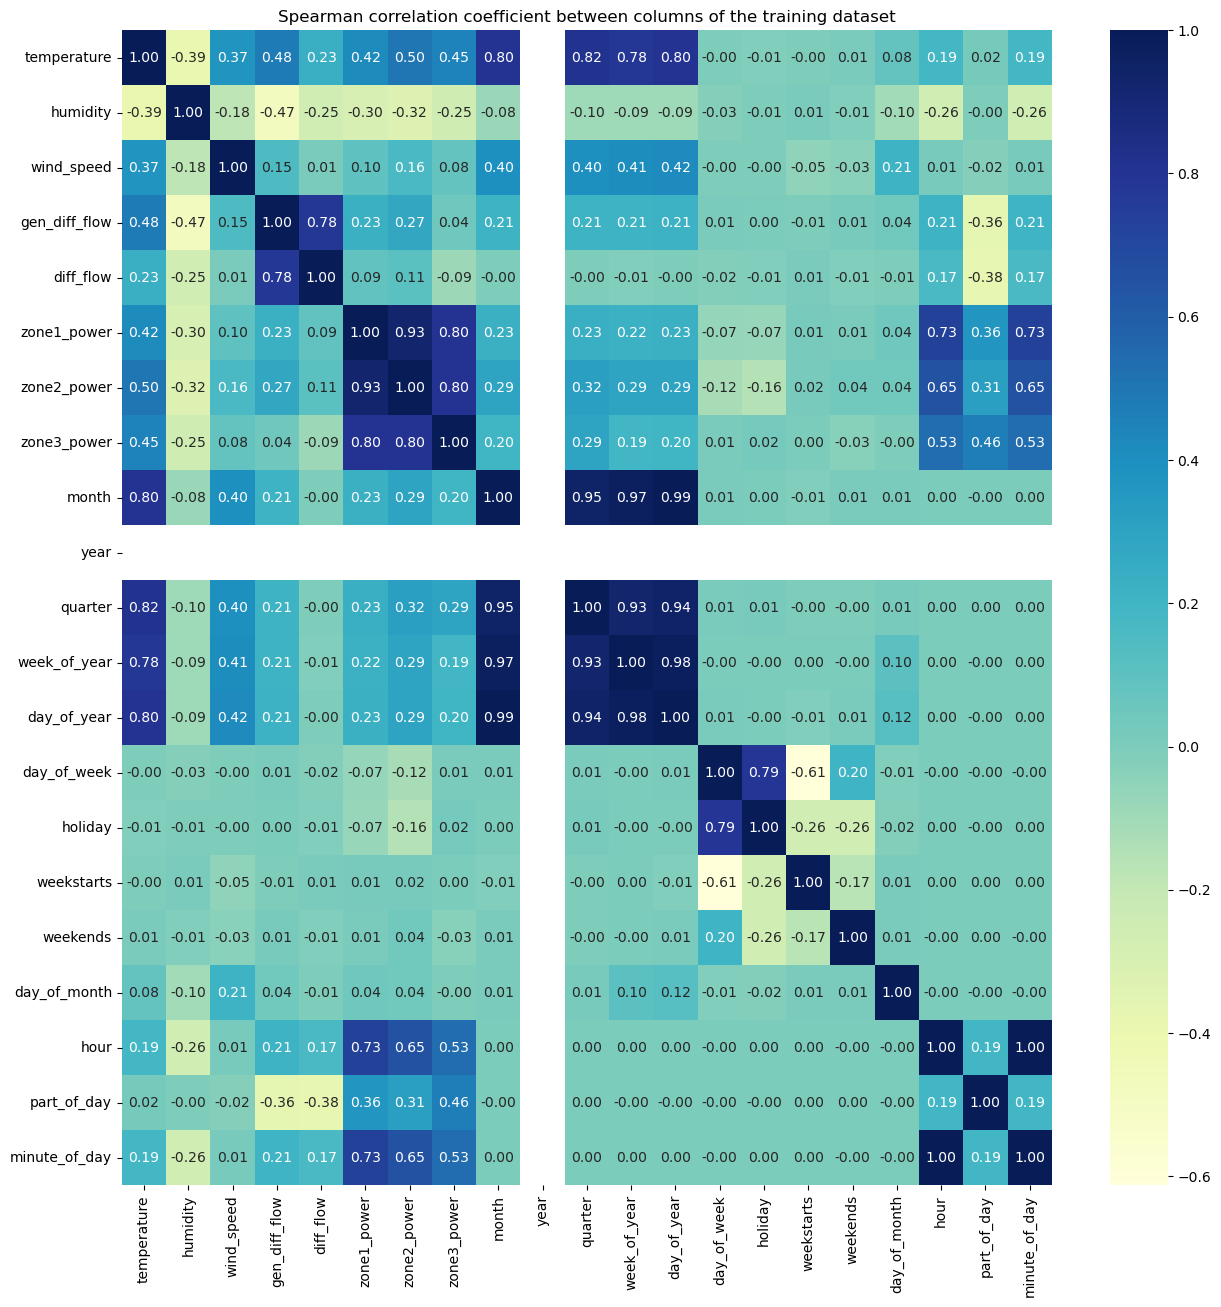

In [28]:
#correlation between the modified feature set in the training data
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.set_title("Spearman correlation coefficient between columns of the training dataset")
sns.heatmap(train.corr(method='spearman', numeric_only=True), cmap="YlGnBu", annot=True, ax=ax, fmt='.2f')

<a id="6.1"></a>
##### Additional Observations  
1) quarter, week_of_year, day_of_year and part_of_day are mostly positively correlated with the output columns    
2) hour and minute of day are highly correlated with the output columns  
3) zone3_power consumption correlates slightly differently with input features as compared to zone1_power and zone2_power  

<a id="7"></a>
### Evaluation method

In [29]:
#returns average of MAPE (mean absolute percentage error) over the output column(s) 
def get_eval_metric(y_truth, y_pred, eval_fn_name="mape"):
    eval_fun = mean_squared_error if eval_fn_name=="rmse" else mean_absolute_percentage_error
    #convert if the arguments are not nupy arrays
    if type(y_truth) != np.ndarray:
        y_truth = y_truth.to_numpy()
    if type(y_pred) != np.ndarray:
        y_pred = y_pred.to_numpy()
    
    #no of outputs = 1
    if len(y_truth.shape) == 1:
        eval_score = eval_fun(y_truth, y_pred)
    #no of outputs > 1
    else:
        mean_value = 0
        for col_idx in range(y_truth.shape[1]):
            mean_value += eval_fun(y_truth[:,col_idx], y_pred[:,col_idx])
        eval_score = mean_value/3
    return math.sqrt(eval_score) if eval_fn_name=="rmse" else eval_score

<a id="8"></a>
### Modelling

<a id="8.1"></a>
#### Simple Baseline  
Predict the mean of the powers from training data for each zones. This will help us to compare the MAPE (mean absolute percentage error) we later get using advanced models

In [30]:
baseline_train_pred = y_train*0 + y_train.mean()
baseline_dev_pred = y_dev*0 + y_train.mean()
baseline_test_pred = y_test*0 + y_train.mean()

In [31]:
print(f"The baseline model on training data has MAPE of: {get_eval_metric(y_train, baseline_train_pred)}")
print(f"The baseline model on validation data has MAPE of: {get_eval_metric(y_dev, baseline_dev_pred)}")
print(f"The baseline model on test data has MAPE of: {get_eval_metric(y_test, baseline_test_pred)}")

The baseline model on training data has MAPE of: 0.23256083011775586
The baseline model on validation data has MAPE of: 0.303565201270861
The baseline model on test data has MAPE of: 0.36237426324436556


In [32]:
print(f"The baseline model on training data has RMSE of: {get_eval_metric(y_train, baseline_train_pred, eval_fn_name='rmse')}")
print(f"The baseline model on validation data has RMSE of: {get_eval_metric(y_dev, baseline_dev_pred, eval_fn_name='rmse')}")
print(f"The baseline model on test data has RMSE of: {get_eval_metric(y_test, baseline_test_pred, eval_fn_name='rmse')}")

The baseline model on training data has RMSE of: 6299.716064089224
The baseline model on validation data has RMSE of: 6186.351480489408
The baseline model on test data has RMSE of: 6992.499686021586


##### Observation  
The baseline model is not good as the predictions are off by ~6k power units (which is as large as 1/4th of the mean power!)

In [33]:
print(f"The min power consumed is {y_train.min().min()} and the mean is {y_train.mean().mean()} units")

The min power consumed is 6707.252298 and the mean is 24376.74707456952 units


<a id="8.2"></a>
#### XGBoost model

In [34]:
#DMatrix is a highly optimized class (for memory and speed) to store datasets
#our dataset does not have categorical columns, so we set them to False
train_dmatrix = xgb.DMatrix(X_train, y_train, enable_categorical=False)
dev_dmatrix = xgb.DMatrix(X_dev, y_dev, enable_categorical=False)
test_dmatrix = xgb.DMatrix(X_test, enable_categorical=False)

In [35]:
def train_xgboost(hyperparameters, train_dmatrix, dev_dmatrix=None, num_boost_round=10000, use_early_stop=False):
    #set evaluation data set
    if dev_dmatrix == None:
        evaluation = [(train_dmatrix, "train")]
    else:
        evaluation = [(train_dmatrix, "train"), (dev_dmatrix, "validation")]
    
    #set early_stopping_rounds
    if use_early_stop:
        early_stopping_rounds = 50
    else:
        early_stopping_rounds = None
        
    #train model
    model = xgb.train(
        params=hyperparameters,
        num_boost_round=num_boost_round,
        dtrain=train_dmatrix,
        evals=evaluation,
        verbose_eval=num_boost_round//10, #11 lines of log
        early_stopping_rounds=early_stopping_rounds,
        )
    return model

In [33]:
hyperparameters_default = {
                            "eta" : 0.01,
                            #"gamma" : 10,
                            "max_depth" : 3,
                            "min_child_weight" : 1,
                            #"reg_lambda" : 1,
                            "subsample" : 1,
                            "colsample_bytree" : 1,
                            #"max_bin" : 256,
                            "objective" : "reg:squarederror",
                            "tree_method" : "gpu_hist",
                            "eval_metric" : "mape", #as evaluation is done using mean absolute percentage error
                            "random_state" : 0,
                            }  

In [80]:
def get_predictions(model, X, optimal_iteration):
    return model.predict(X, iteration_range=(0, optimal_iteration))

In [37]:
model = train_xgboost(hyperparameters_default, train_dmatrix, dev_dmatrix, use_early_stop=True)

[0]	train-mape:0.98977	validation-mape:0.98856
[1000]	train-mape:0.04920	validation-mape:0.07044
[1568]	train-mape:0.04404	validation-mape:0.06795


In [38]:
print(f"Best dev set MAPE of {model.best_score} using {model.best_iteration+1} rounds of boosting")

Best dev set MAPE of 0.06786237107246046 using 1518 rounds of boosting


In [39]:
model_preds = get_predictions(model, test_dmatrix, model.best_iteration+1)

In [40]:
xgboost_train_pred = get_predictions(model, train_dmatrix, model.best_iteration+1)
xgboost_dev_pred = get_predictions(model, dev_dmatrix, model.best_iteration+1)
xgboost_test_pred = get_predictions(model, test_dmatrix, model.best_iteration+1)

In [41]:
print(f"The XGBoost model on training data has MAPE of: {get_eval_metric(y_train, xgboost_train_pred)}")
print(f"The XGBoost model on validation data has MAPE of: {get_eval_metric(y_dev, xgboost_dev_pred)}")
print(f"The XGBoost model on test data has MAPE of: {get_eval_metric(y_test, xgboost_test_pred)}")

The XGBoost model on training data has MAPE of: 0.044409374724035465
The XGBoost model on validation data has MAPE of: 0.06786237140102479
The XGBoost model on test data has MAPE of: 0.148845027443512


In [42]:
print(f"The XGBoost model on training data has RSME of: {get_eval_metric(y_train, xgboost_train_pred, eval_fn_name='rmse')}")
print(f"The XGBoost model on validation data has RSME of: {get_eval_metric(y_dev, xgboost_dev_pred, eval_fn_name='rmse')}")
print(f"The XGBoost model on test data has RSME of: {get_eval_metric(y_test, xgboost_test_pred, eval_fn_name='rmse')}")

The XGBoost model on training data has RSME of: 1382.2446806876198
The XGBoost model on validation data has RSME of: 2004.7353232718328
The XGBoost model on test data has RSME of: 3932.959907308653


In [43]:
print(f"The unseen test set has MAPE of: {get_eval_metric(y_test, model_preds)}")

The unseen test set has MAPE of: 0.148845027443512


<a id="9"></a>
### Hyperparameter optimization  
Let's fine-tune the hyperparameters using Cross-Validation. The Cross Validation technique we are going to use is similar to TimeSeriesSplit from sklearn, but only that it is going to be semantic.  
  
We will train of first few months and predict on the next month. We have 9 months of training data with 1 month of validation data. Let's start with training on the first 5 months for the first fold and let the last fold be with training on the entire 9 months of training data
train_dmatrix = xgb.DMatrix(X_train, y_train, enable_categorical=False)

<a id="9.1"></a>
#### Creating folds for cross-validation

In [71]:
#create splits
#tuple of size k (=no of folds), with each element being (train_fold_indexes, test_fold_indexes) for that particular fold
traindev = pd.concat([train, dev], ignore_index=True)
#inp_feat_names_processed = sorted(list(set(traindev.columns).difference(set(out_feat_names))))
X_traindev = traindev.drop(out_feat_names, axis=1)
y_traindev = traindev[out_feat_names]

folds = []
count = 1
for month_no in range(5, 10):
    print(f"Fold {count}: Train fold contains months 1 till {month_no} and test fold contains month {month_no+1}")
    train_fold_indexes = traindev[traindev.month<=month_no].index
    test_fold_indexes = traindev[traindev.month==month_no+1].index
    folds.append((train_fold_indexes, test_fold_indexes))
    count += 1
folds = tuple(folds)

Fold 1: Train fold contains months 1 till 5 and test fold contains month 6
Fold 2: Train fold contains months 1 till 6 and test fold contains month 7
Fold 3: Train fold contains months 1 till 7 and test fold contains month 8
Fold 4: Train fold contains months 1 till 8 and test fold contains month 9
Fold 5: Train fold contains months 1 till 9 and test fold contains month 10


<a id="9.2"></a>
#### Running the model with the initial set of hyperparameters on the folds

In [45]:
traindev_dmatrix = xgb.DMatrix(X_traindev, y_traindev, enable_categorical=False)
cv_results = xgb.cv(
                    params=hyperparameters_default,
                    dtrain=traindev_dmatrix,
                    num_boost_round=10000,
                    seed=0,
                    folds=folds,
                    metrics={'mape'},
                    early_stopping_rounds=50
                )

In [57]:
cv_results.head(3)

,train-mape-mean,train-mape-std,test-mape-mean,test-mape-std
0,0.989955,0.000001,0.989927,0.001056
1,0.980035,0.000003,0.979968,0.002090
2,0.970214,0.000004,0.970116,0.003135


In [47]:
print(f"The average validation MAPE over {len(folds)} is {cv_results['test-mape-mean'].min()} using {cv_results['test-mape-mean'].argmin()} rounds of boosting")

The average validation MAPE over 5 is 0.10779453082047277 using 1782 rounds of boosting


<a id="9.3"></a>
#### Tuning of model architecture/complexity

In [48]:
#searching for best max_depth and min_child_weight combination that decides the complexity of the model
#search range set after a few runs
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(7,16,2)
    for min_child_weight in range(7,17,3)
]

In [55]:
print(f"No of models evaluated are: {len(gridsearch_params)}")

No of models evaluated are: 20


In [50]:
# Define initial best params and MAPE
total_time = 0
min_mape = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    start_time = time.time()
    print(f"CV with max_depth={max_depth}, min_child_weight={min_child_weight}")
    # Update our parameters
    hyperparameters_default['max_depth'] = max_depth
    hyperparameters_default['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params=hyperparameters_default,
        dtrain=traindev_dmatrix,
        num_boost_round=10000,
        seed=0,
        folds=folds,
        metrics={'mape'},
        early_stopping_rounds=50
    )
    # Update best MAPE
    mean_mape = cv_results['test-mape-mean'].min()
    boost_rounds = cv_results['test-mape-mean'].argmin()
    print(f"\tMAPE {mean_mape} for {boost_rounds} rounds")
    if mean_mape < min_mape:
        min_mape = mean_mape
        best_params = (max_depth,min_child_weight)
    print(f"Time taken: {time.time()-start_time} seconds")
    total_time += time.time()-start_time
print(f"Best params: {best_params[0]}, {best_params[1]}, MAPE: {min_mape}")
print(f"Total time taken: {total_time} seconds")

CV with max_depth=7, min_child_weight=7
	MAPE 0.10359389713986836 for 551 rounds
Time taken: 278.5780701637268 seconds
CV with max_depth=7, min_child_weight=10
	MAPE 0.10361363215312636 for 486 rounds
Time taken: 238.34726977348328 seconds
CV with max_depth=7, min_child_weight=13
	MAPE 0.103315642663993 for 526 rounds
Time taken: 253.85180282592773 seconds
CV with max_depth=7, min_child_weight=16
	MAPE 0.10309261690127884 for 528 rounds
Time taken: 251.17152905464172 seconds
CV with max_depth=9, min_child_weight=7
	MAPE 0.1038323670226627 for 463 rounds
Time taken: 474.184663772583 seconds
CV with max_depth=9, min_child_weight=10
	MAPE 0.10374690288729667 for 648 rounds
Time taken: 551.3216817378998 seconds
CV with max_depth=9, min_child_weight=13
	MAPE 0.10392858086604254 for 486 rounds
Time taken: 266.25230264663696 seconds
CV with max_depth=9, min_child_weight=16
	MAPE 0.10352731736627385 for 593 rounds
Time taken: 86.15527868270874 seconds
CV with max_depth=11, min_child_weight=7
	

In [56]:
print(f"The average validation MAPE over {len(folds)} folds is {min_mape} using max_depth: {best_params[0]} and min_child_weight: {best_params[1]}")

The average validation MAPE over 5 is 0.10287541189872744 using max_depth: 15 and min_child_weight: 7


In [38]:
#fixing the parameters based on tuning result
hyperparameters_default['max_depth'] = best_params[0]
hyperparameters_default['min_child_weight'] = best_params[1]

In [39]:
hyperparameters_default

{'eta': 0.01,
 'max_depth': 15,
 'min_child_weight': 7,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'reg:squarederror',
 'tree_method': 'gpu_hist',
 'eval_metric': 'mape',
 'random_state': 0}

<a id="9.4"></a>
#### Tuning of data sampling strategy

In [61]:
#searching for best subsample and colsample combination that decides the slice of data to train model on
#this has the potential to reduce overfitting
gridsearch_params_tuning2 = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [65]:
print(f"No of models evaluated are: {len(gridsearch_params_tuning2)}")

No of models evaluated are: 16


In [66]:
# Define initial best params and MAPE
total_time_tuning2 = 0
min_mape_tuning2 = float("Inf")
best_params_tuning2 = None
for subsample, colsample in gridsearch_params_tuning2:
    start_time = time.time()
    print(f"CV with subsample={subsample}, colsample={colsample}")
    # Update our parameters
    hyperparameters_default['subsample'] = subsample
    hyperparameters_default['colsample_bytree'] = colsample
    # Run CV
    cv_results_tuning2 = xgb.cv(
        params=hyperparameters_default,
        dtrain=traindev_dmatrix,
        num_boost_round=10000,
        seed=0,
        folds=folds,
        metrics={'mape'},
        early_stopping_rounds=50
    )
    # Update best MAPE
    mean_mape_tuning2 = cv_results_tuning2['test-mape-mean'].min()
    boost_rounds_tuning2 = cv_results_tuning2['test-mape-mean'].argmin()
    print(f"\tMAPE {mean_mape_tuning2} for {boost_rounds_tuning2} rounds")
    if mean_mape_tuning2 < min_mape_tuning2:
        min_mape_tuning2 = mean_mape_tuning2
        best_params_tuning2 = (subsample,colsample)
    print(f"Time taken: {time.time()-start_time} seconds")
    total_time_tuning2 += time.time()-start_time
print(f"Best params: {best_params_tuning2[0]}, {best_params_tuning2[1]}, MAPE: {min_mape_tuning2}")
print(f"Total time taken: {total_time_tuning2} seconds")

CV with subsample=0.7, colsample=0.7
	MAPE 0.10587168903096207 for 684 rounds
Time taken: 310.52920174598694 seconds
CV with subsample=0.7, colsample=0.8
	MAPE 0.10454675271225147 for 1262 rounds
Time taken: 540.957756280899 seconds
CV with subsample=0.7, colsample=0.9
	MAPE 0.10344715346299349 for 690 rounds
Time taken: 345.94433641433716 seconds
CV with subsample=0.7, colsample=1.0
	MAPE 0.10195376206139313 for 1028 rounds
Time taken: 491.55143094062805 seconds
CV with subsample=0.8, colsample=0.7
	MAPE 0.10609382197789793 for 643 rounds
Time taken: 311.0657949447632 seconds
CV with subsample=0.8, colsample=0.8
	MAPE 0.10490812231464124 for 630 rounds
Time taken: 320.1555097103119 seconds
CV with subsample=0.8, colsample=0.9
	MAPE 0.10368916889993188 for 667 rounds
Time taken: 357.77918910980225 seconds
CV with subsample=0.8, colsample=1.0
	MAPE 0.10218744848181485 for 760 rounds
Time taken: 411.17202639579773 seconds
CV with subsample=0.9, colsample=0.7
	MAPE 0.10617289439440872 for

In [67]:
print(f"The average validation MAPE over {len(folds)} folds is {min_mape_tuning2} using subsample: {best_params_tuning2[0]} and colsample_bytree: {best_params_tuning2[1]}")

The average validation MAPE over 5 folds is 0.10195376206139313 using subsample: 0.7 and colsample_bytree: 1.0


In [41]:
#fixing the parameters based on tuning result
hyperparameters_default['subsample'] = best_params_tuning2[0]
hyperparameters_default['colsample_bytree'] = best_params_tuning2[1]

In [42]:
hyperparameters_default

{'eta': 0.01,
 'max_depth': 15,
 'min_child_weight': 7,
 'subsample': 0.7,
 'colsample_bytree': 1,
 'objective': 'reg:squarederror',
 'tree_method': 'gpu_hist',
 'eval_metric': 'mape',
 'random_state': 0}

<a id="9.5"></a>
#### Tuning the learning rate

In [45]:
total_time_tuning3 = 0
min_mape_tuning3 = float("Inf")
best_params_tuning3 = None
#search range set after a few runs
for eta in [.3, .2, .1, .05, .01]:
    start_time = time.time()
    print(f"CV with eta={eta}")
    # We update our parameters
    hyperparameters_default['eta'] = eta
    # Run and time CV
    cv_results_tuning3 = xgb.cv(
        params=hyperparameters_default,
        dtrain=traindev_dmatrix,
        num_boost_round=10000,
        seed=0,
        folds=folds,
        metrics={'mape'},
        early_stopping_rounds=50
    )
    # Update best score
    mean_mape_tuning3 = cv_results_tuning3['test-mape-mean'].min()
    boost_rounds_tuning3 = cv_results_tuning3['test-mape-mean'].argmin()
    print(f"\tMAPE {mean_mape_tuning3} for {boost_rounds_tuning3} rounds")
    if mean_mape_tuning3 < min_mape_tuning3:
        min_mape_tuning3 = mean_mape_tuning3
        best_params_tuning3 = eta
    print(f"Time taken: {time.time()-start_time} seconds")
    total_time_tuning3 += time.time()-start_time
print(f"Best eta: {best_params_tuning3}, MAPE: {min_mape_tuning3}")
print(f"Total time taken: {total_time_tuning3} seconds")

CV with eta=0.3
	MAPE 0.10352820012791202 for 39 rounds
Time taken: 56.68612623214722 seconds
CV with eta=0.2
	MAPE 0.10303590213909801 for 72 rounds
Time taken: 67.55343556404114 seconds
CV with eta=0.1
	MAPE 0.10269325144691197 for 140 rounds
Time taken: 110.87100028991699 seconds
CV with eta=0.05
	MAPE 0.10254509354256076 for 182 rounds
Time taken: 132.4319944381714 seconds
CV with eta=0.01
	MAPE 0.10195376206139313 for 1028 rounds
Time taken: 688.2979757785797 seconds
Best eta: 0.01, MAPE: 0.10195376206139313
Total time taken: 1055.840759754181 seconds


Note: eta of 0.005 took more than 50 minutes and therefore due to practical reasons we stopped at eta of 0.01

In [48]:
print(f"The average validation MAPE over {len(folds)} folds is {min_mape_tuning3} using eta: {best_params_tuning3}")

The average validation MAPE over 5 folds is 0.10195376206139313 using eta: 0.01


In [49]:
#fixing the learning rate to 0.01 due to the time taken by eta=0.005 
hyperparameters_default['eta'] = best_params_tuning3

<a id="9.6"></a>
#### Tuning of number of iteration  
Let's fix the number of iterations using the test data  

In [76]:
hyperparameters_default

{'eta': 0.01,
 'max_depth': 15,
 'min_child_weight': 7,
 'subsample': 0.7,
 'colsample_bytree': 1,
 'objective': 'reg:squarederror',
 'tree_method': 'gpu_hist',
 'eval_metric': 'mape',
 'random_state': 0}

In [73]:
traindev_dmatrix = xgb.DMatrix(X_traindev, y_traindev, enable_categorical=False)
test_dmatrix = xgb.DMatrix(X_test, y_test, enable_categorical=False)

In [75]:
model = train_xgboost(hyperparameters_default, traindev_dmatrix, test_dmatrix, use_early_stop=True)

[0]	train-mape:0.98995	validation-mape:0.98961
[442]	train-mape:0.01437	validation-mape:0.06462


In [91]:
print(f"Best test set MAPE of {round(model.best_score,6)} using {model.best_iteration+1} rounds of boosting")

Best test set MAPE of 0.064185 using 394 rounds of boosting


In [82]:
optimal_boost_round = model.best_iteration+1

In [89]:
model_preds = get_predictions(model, test_dmatrix, optimal_boost_round)

In [92]:
print(f"The test set has MAPE of: {round(get_eval_metric(y_test, model_preds),6)}")

The test set has MAPE of: 0.064185


<a id="10"></a>
### Training our best model on complete training data before inferencing on new data

In [94]:
X = train_complete.drop(out_feat_names, axis=1)
X = create_features(X)
y = train_complete[out_feat_names]
#DMatrix is a highly optimized class (for memory and speed) to store datasets
#our dataset does not have categorical columns, so we set them to False
train_complete_dmatrix = xgb.DMatrix(X, y, enable_categorical=False)
model_complete = train_xgboost(hyperparameters_default, train_complete_dmatrix, num_boost_round=optimal_boost_round)

[0]	train-mape:0.98995
[39]	train-mape:0.66836
[78]	train-mape:0.45130
[117]	train-mape:0.30484
[156]	train-mape:0.20605
[195]	train-mape:0.13949
[234]	train-mape:0.09469
[273]	train-mape:0.06458
[312]	train-mape:0.04436
[351]	train-mape:0.03084
[390]	train-mape:0.02187
[393]	train-mape:0.02133


In [96]:
xgboost_final_train_pred = get_predictions(model_complete, train_complete_dmatrix, optimal_boost_round)

In [97]:
print(f"The XGBoost model on training data has MAPE of: {get_eval_metric(y, xgboost_final_train_pred)}")

The XGBoost model on training data has MAPE of: 0.02132630272539955


In [98]:
print(f"The XGBoost model on training data has RSME of: {get_eval_metric(y, xgboost_final_train_pred, eval_fn_name='rmse')}")

The XGBoost model on training data has RSME of: 653.6446225955425


<a id="11"></a>
### Predictions on Inference data

##### Re-doing processing on inference data just to cross-check

In [100]:
inference = pd.read_csv('Hyderabad_Power_Test.csv')

#rename all columns for convenience
inp_feat_names = ['date_time', 'temperature', 'humidity', 'wind_speed', 'gen_diff_flow', 'diff_flow']
out_feat_names = ['zone1_power', 'zone2_power', 'zone3_power']
inference = inference.set_axis(inp_feat_names, axis='columns', copy=False)

#converting DateTime column from str to Timestamp
inference['date_time'] = pd.to_datetime(inference['date_time'])

#adding new input features
inference = create_features(inference)

#DMatrix is a highly optimized class (for memory and speed) to store datasets
#our dataset does not have categorical columns, so we set them to False
inference_dmatrix = xgb.DMatrix(inference, enable_categorical=False)

#get predictions
model_inference_preds = get_predictions(model_complete, inference_dmatrix, optimal_boost_round)

#assert shape mismatch
assert model_inference_preds.shape != inference.shape, "Error in code"

<a id="12"></a>
### Vizualizing the predictions

In [101]:
full_data = train_complete.loc[:,['date_time']]
full_data['data_source'] = 'train'

In [102]:
inference = pd.read_csv('Hyderabad_Power_Test.csv')
#retain only DateTime column
inference = inference.loc[:, ['DateTime']]
#rename column
inference.columns = ['date_time']
inference['data_source'] = 'inference'

In [103]:
#concatenate dataframes along the index axis
full_data = pd.concat([full_data, inference], axis=0, ignore_index=True)

In [104]:
full_data['zone1_power'] = np.nan
full_data['zone2_power'] = np.nan
full_data['zone3_power'] = np.nan

In [105]:
#populating training ground truths
full_data.loc[full_data['data_source']=='train', 'zone1_power'] = train_complete.loc[:,'zone1_power']
full_data.loc[full_data['data_source']=='train', 'zone2_power'] = train_complete.loc[:,'zone2_power']
full_data.loc[full_data['data_source']=='train', 'zone3_power'] = train_complete.loc[:,'zone3_power']

In [106]:
full_data['zone1_power_prediction'] = np.nan
full_data['zone1_power_prediction'] = np.nan
full_data['zone1_power_prediction'] = np.nan

In [107]:
#populating predictions
full_data.loc[full_data['data_source']=='inference', 'zone1_power_prediction'] = model_inference_preds[:, 0]
full_data.loc[full_data['data_source']=='inference', 'zone2_power_prediction'] = model_inference_preds[:, 1]
full_data.loc[full_data['data_source']=='inference', 'zone3_power_prediction'] = model_inference_preds[:, 2]

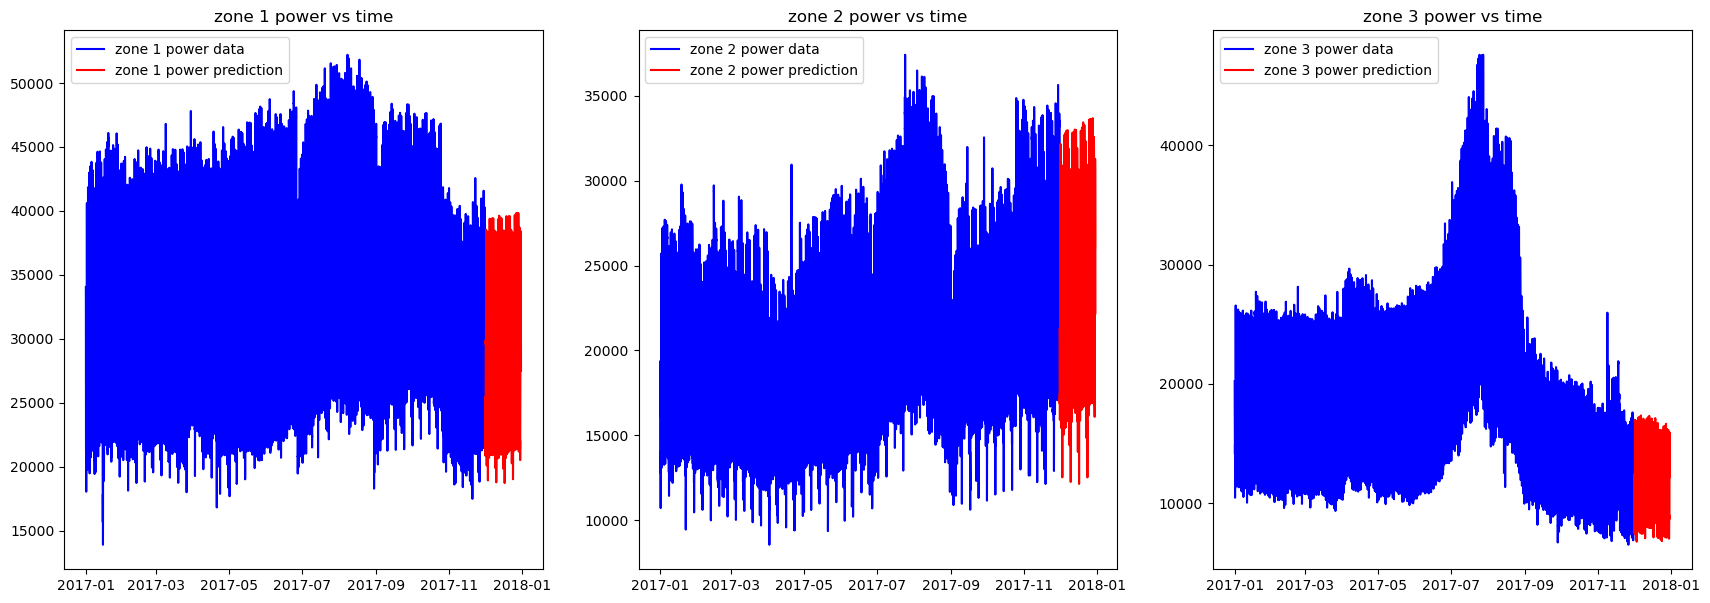

In [108]:
fig, ax = plt.subplots(1, 3, figsize=(21, 7))
ax[0].set_title(f"zone 1 power vs time")
ax[0].plot(full_data.loc[:,"date_time"], full_data.loc[:,"zone1_power"], 'b', label="zone 1 power data")
ax[0].plot(full_data.loc[:,"date_time"], full_data.loc[:,"zone1_power_prediction"], 'r', label="zone 1 power prediction")
ax[0].legend()
ax[1].set_title(f"zone 2 power vs time")
ax[1].plot(full_data.loc[:,"date_time"], full_data.loc[:,"zone2_power"], 'b', label="zone 2 power data")
ax[1].plot(full_data.loc[:,"date_time"], full_data.loc[:,"zone2_power_prediction"], 'r', label="zone 2 power prediction")
ax[1].legend()
ax[2].set_title(f"zone 3 power vs time")
ax[2].plot(full_data.loc[:,"date_time"], full_data.loc[:,"zone3_power"], 'b', label="zone 3 power data")
ax[2].plot(full_data.loc[:,"date_time"], full_data.loc[:,"zone3_power_prediction"], 'r', label="zone 3 power prediction")
ax[2].legend()

<a id="13"></a>
### Creating Submission file

In [109]:
inference_submission = pd.read_csv('Hyderabad_Power_Test.csv')
#retaining only DateTime column
inference_submission = inference_submission.loc[:, ['DateTime']]

In [110]:
inference_submission['Zone 1 Power Consumption'] = model_inference_preds[:,0]
inference_submission['Zone 2  Power Consumption'] = model_inference_preds[:,1]
inference_submission['Zone 3  Power Consumption'] = model_inference_preds[:,2]

In [111]:
inference_submission.tail(3)

,DateTime,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
4317,2017-12-30 23:30:00,28670.777344,23113.095703,12421.816406
4318,2017-12-30 23:40:00,28041.826172,22632.039062,12283.383789
4319,2017-12-30 23:50:00,27520.283203,22189.486328,12187.801758


In [112]:
inference_submission.to_csv(f'submisson_ara_{optimal_boost_round}.csv', encoding='utf-8', index=False)

In [113]:
inference_submission

,DateTime,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-12-01 00:00:00,25415.912109,21255.351562,11733.283203
1,2017-12-01 00:10:00,25006.853516,21060.005859,11562.096680
2,2017-12-01 00:20:00,24734.115234,20644.251953,11291.601562
3,2017-12-01 00:30:00,24533.189453,20327.332031,11082.071289
4,2017-12-01 00:40:00,24332.474609,19901.080078,10913.636719
...,...,...,...,...
4315,2017-12-30 23:10:00,30070.429688,24369.792969,12825.583008
4316,2017-12-30 23:20:00,29414.703125,23671.431641,12649.414062
4317,2017-12-30 23:30:00,28670.777344,23113.095703,12421.816406
4318,2017-12-30 23:40:00,28041.826172,22632.039062,12283.383789
